In [1]:
import cv2
import numpy as np
import imutils
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('../src')

from algos import card_utils,detect,img_utils,preprocessing

In [3]:
def contour_to_img(shape,ctrs,thickness=1,colors=[]):
    img = np.full(shape, 0).astype(np.uint8)
    if colors:
        for _i,_n in enumerate(ctrs):
            cv2.drawContours(img, ctrs, _i, colors[_i], thickness=thickness)
        return img
    else:
        cv2.drawContours(img, ctrs, -1, (255,255,0), thickness=thickness)
        return img

In [ ]:
# too off center image_path = '../data/gpk-38b.webp'
# image_path = '../data/gpk-8a-psa.webp' # PSA
image_path = "../data/gpk-20b.webp"
image_path = "../data/gpk-37a.png"
image_path = "../data/gpk-16a.webp"  # grabs background
image_path = "../data/gpk-10b.webp"  # white back
image_path = "../data/gpk-12a.webp"  # sharp corners
image_path = "../data/gpk-40b.webp"  # black back
# image_path = "../data/gpk-14b.webp"  # sharp corners
# image_path = '../data/gpk-9b.webp' #big top banner
# image_path = "../data/gpk-1b.webp"  # white back poor contour
# image_path = "../data/gpk-35a.webp"  # white back med
# image_path = "../data/gpk-22b.webp"  # thatch back poor corners
# image_path = "../data/gpk-41a.webp"  # black back lighting
image_path = "../data/gpk-1b-2.webp"  # poor corners
# image_path = "../data/gpk-8b.webp"  # cant mask
# image_path = "../data/gpk-22a.webp" #checkerboard back
# image_path = "../data/gpk-29b.webp" #4 rounded corners
# image_path = "../data/gpk-8a.webp" #4 rounded corners
# image_path = "../data/gpk-17a.webp" #white back
# image_path = "../data/gpk-15b.webp" #white back terrible
# image_path = "../data/gpk-29b-2.webp" # bad corners
# image_path = "../data/gpk-6b.webp" #hand in back
# image_path = "../data/gpk-26b.webp" #sharp corners, good results
# image_path = "../data/gpk-4b.webp" # sharp corners, good results
#image_path = "../data/gpk-87b.webp"
# image_path = "../data/gpk-31b.webp"
image_path = "../data/gpk-31b-back.webp"
image_path = "../data/gpk-33b.webp"

orig, image, mask, warp, results = preprocessing.score_card(
    image_path=image_path, debug=False
)

corner_imgs = []
edge_imgs = []

for _n in range(4):
    corner_imgs.append(
        contour_to_img(
            results["corner-shape"][_n],
            [results["corner-ideal-contour"][_n], results["corner-contour"][_n]],
            thickness=1,
        )
    )
    edge_imgs.append(
        contour_to_img(
            results["edge-shape"][_n],
            [
                results["edge-contour"][_n],
                results["edge-straight-ideal-contour"][_n],
            ],
            thickness=3,
            colors=[
                (
                    255,
                    0,
                    0,
                ),
                (0, 255, 0),
            ],
        )
    )

trying k  15
found border at  386 [255] [20]
border color 254, corner 98 lower thresh 253 upper thresh 255
winning cont area  1104534.5
found border at  31 [255] [20]
border color 254, corner 109 lower thresh 252 upper thresh 256
border color 254, corner 136 lower thresh 252 upper thresh 256
border color 254, corner 0 lower thresh 252 upper thresh 256
border color 254, corner 209 lower thresh 252 upper thresh 256
wapr shape (1600, 1600)
ideals [[[  15 1167]
  [ 838 1166]
  [ 838 1196]
  [  15 1197]]]
ideals [[[ 15  53]
  [838  52]
  [838  82]
  [ 15  83]]]
border color 254, corner 0 lower thresh 252 upper thresh 256
border color 254, corner 0 lower thresh 252 upper thresh 256
border color 254, corner 63 lower thresh 252 upper thresh 256
border color 254, corner 0 lower thresh 252 upper thresh 256
corner results TL TR BL BR {0: 0.9155555555555556, 1: 0.6955555555555556, 2: 0.9777777777777777, 3: 0.9666666666666667}
straight edge results TBLR {0: 0.846552231370998, 1: 0.0, 2: 0.937285873

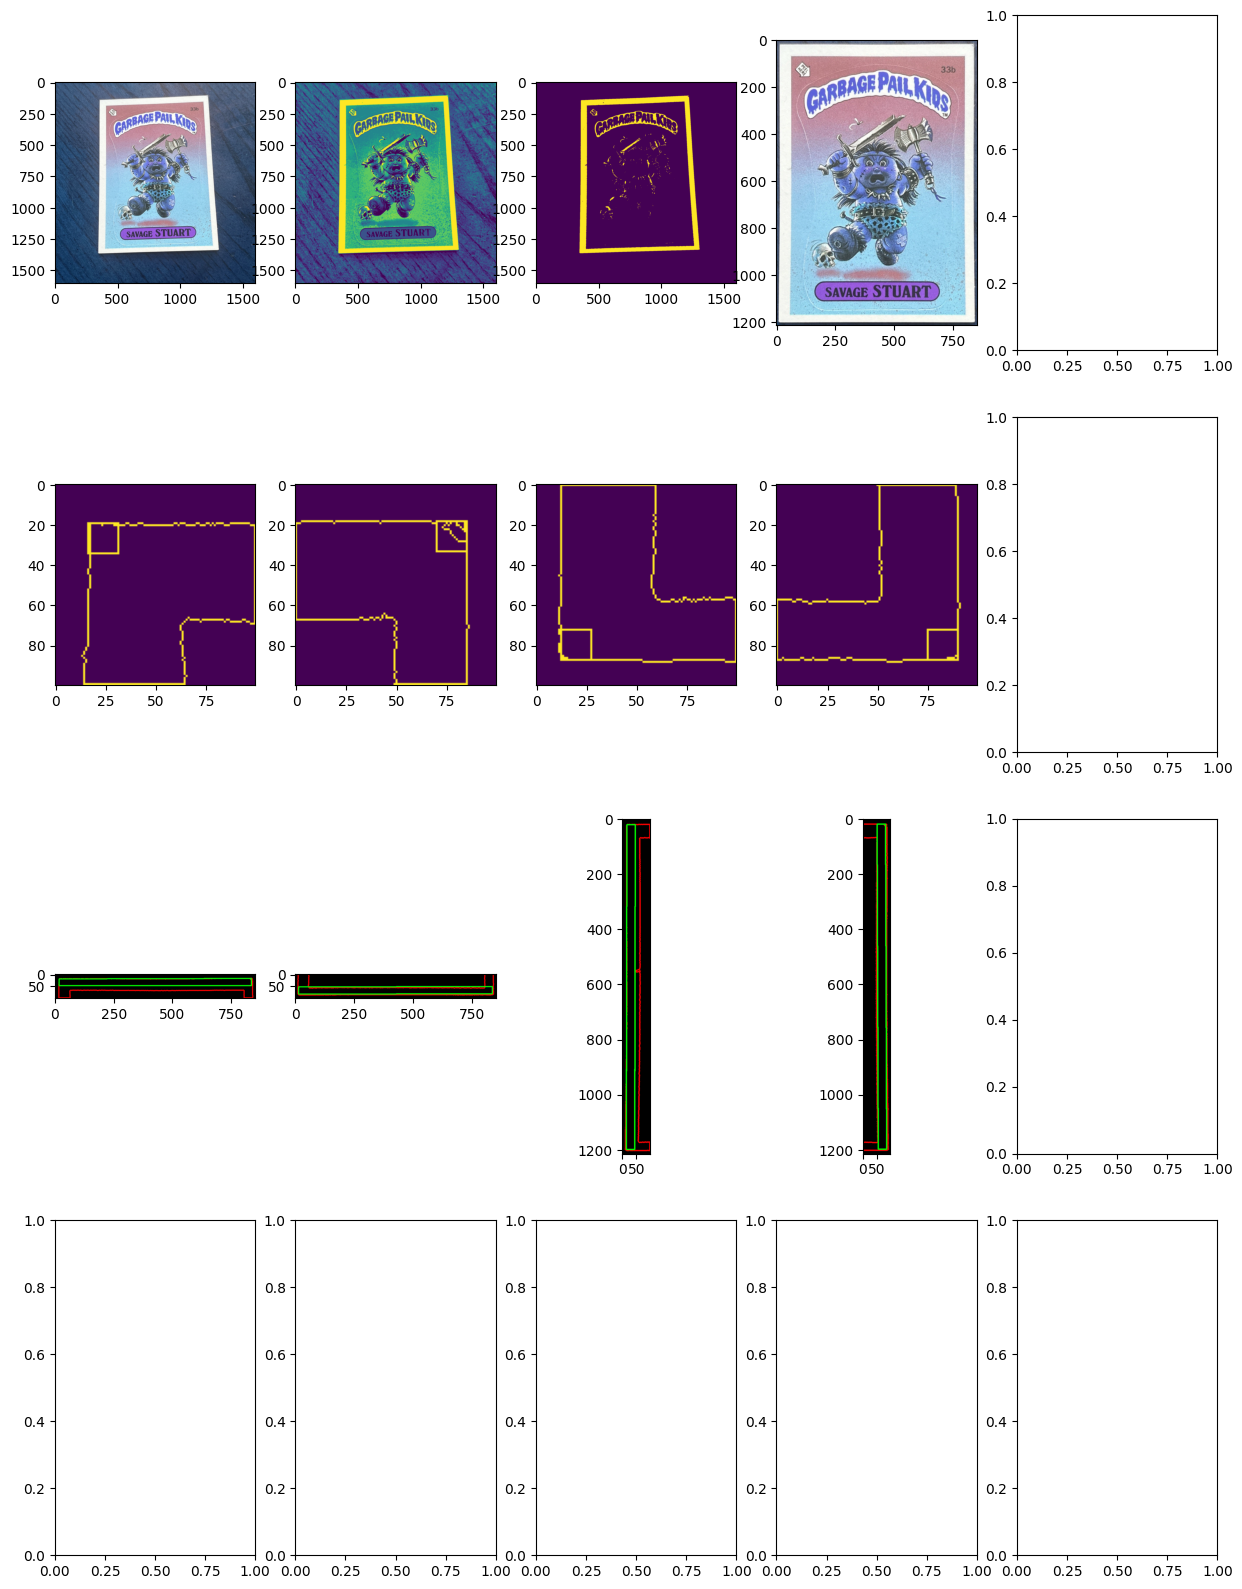

In [5]:
fig, ax = plt.subplots(nrows=4,ncols=5,figsize=(15,20))

ax[0,0].imshow(orig)
ax[0,1].imshow(image)
ax[0,2].imshow(mask)
ax[0,3].imshow(warp)

ax[1,0].imshow(corner_imgs[0])
ax[1,1].imshow(corner_imgs[1])
ax[1,2].imshow(corner_imgs[2])
ax[1,3].imshow(corner_imgs[3])

ax[2,0].imshow(edge_imgs[0])
ax[2,1].imshow(edge_imgs[1])
ax[2,2].imshow(edge_imgs[2])
ax[2,3].imshow(edge_imgs[3])

